___
# Projeto 1 de Ciencia do Dados
___
## Rafael Libertini

# Introdução
 
   Neste projeto faremos uma analise de variaves quantitativas, comparando-as com o IDH, indicador que resume a medida de desenvolvimento de um pais, ultilizando três parâmetros: saúde, educação e renda. Essa variavel foi cruzada com duas outras, analisando a correlação. O intuito do projeto foi o de treinar o uso do ferramental aprendido em sala e exercitar a analise de dados, formulando hipoteses, analises e conclusão.

## Preparando os dados:

In [2]:
#importando os módulos necessários
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
#abrindo os databases
D_HDI = pd.read_excel("Indicator_HDI.xlsx")
D_PVMNT = pd.read_excel("roads paved.xlsx")
D_URB = pd.read_excel("indicator EN_URB_MCTY_TL_ZS.xls.xlsx")

In [49]:
#separando o ano de base
D_HDI_B = D_HDI.loc[:,[ "HDI",1990]]
D_URB_B = D_URB.loc[:,["Population in urban agglomerations of more than 1 million (% of total population)",1990]]
D_PVMNT_B = D_PVMNT.loc[:,["Roads, paved (% of total roads)","1990"]]

#alterando os indices
HDI_IDX = D_HDI_B.set_index("HDI")
URB_IDX = D_URB_B.set_index("Population in urban agglomerations of more than 1 million (% of total population)")
PVMNT_IDX = D_PVMNT_B.set_index("Roads, paved (% of total roads)")

#juntando os datasets
FRST_JOIN = URB_IDX.join(PVMNT_IDX, how='inner',lsuffix='_URB',rsuffix='_PVMNT')
D_JOIN = FRST_JOIN.join(HDI_IDX,how='inner',lsuffix='_URB',rsuffix='_IDH')
D_JOIN.columns=["1990_URB","1990_PVMNT","1990_IDH"]
D_JOIN.to_csv("FINAL.csv")
D_JOIN = D_JOIN.dropna()
D_JOIN.head()

,1990_URB,1990_PVMNT,1990_IDH
Algeria,7.546848,67.0,0.551
Argentina,39.379239,28.5,0.697
Australia,60.258457,35.0,0.873
Austria,27.184880,100.0,0.790
Bolivia,25.155654,4.3,0.560



# Formulação de Hipotese

 Para conduzir uma analise, é uma boa medida pensar em uma pergunta a ser respondida por ela. Tendo em vista o foco da analise no indice IDH, é preciso verificar a influencia de outras variaveis nesse fator. Para tal, foram escolhidas as variaveis estradas pavimentadas(% do total) e população em nucleos urbanos com mais de 1 milhão de pessoas(% do total). 

## Hipótese:
       
*A porcentagem de estradas pavimentadas e de população em areas urbanas influencia o IDH?*
___


# Analise Individual
___

## Ultilizando as ferramentas boxplot e histograma para cada variavel:


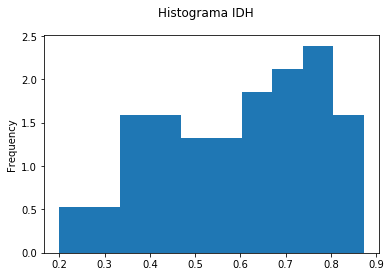

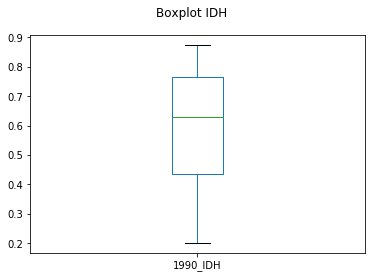

count    56.000000
mean      0.596143
std       0.178629
min       0.200000
25%       0.435000
50%       0.630000
75%       0.764500
max       0.873000
Name: 1990_IDH, dtype: float64

In [37]:
#Plotando os histogramas para o HDI
D_JOIN["1990_IDH"].plot(kind="hist", density=True)
plt.suptitle("Histograma IDH")
plt.show()
D_JOIN["1990_IDH"].plot.box()
plt.suptitle("Boxplot IDH")
plt.show()
D_JOIN["1990_IDH"].describe()  


### Análise
A variaveL IDH tem uma cauda média para a esquerda, o que nos diz que existem mais paises com o IDH alto. A zona interquatil é grande, identificando que a maioria dos amostra encontra-se na na zona central inferior à mediana.
____


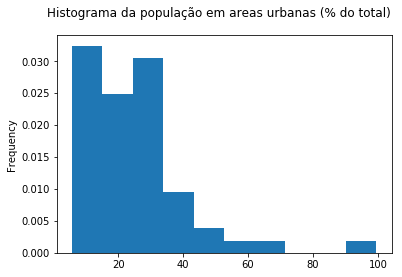

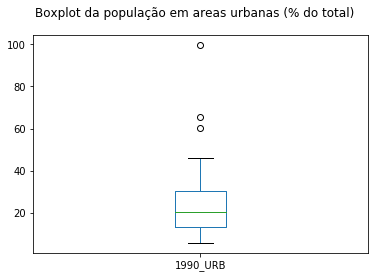

count    56.000000
mean     24.042815
std      16.474811
min       5.728201
25%      13.488981
50%      20.448501
75%      30.228594
max      99.516732
Name: 1990_URB, dtype: float64

In [41]:
#Plotando os histogramas para o  URB
D_JOIN["1990_URB"].plot(kind="hist", density=True)
plt.suptitle("Histograma da população em areas urbanas (% do total)")
plt.show()
D_JOIN["1990_URB"].plot.box()
plt.suptitle("Boxplot da população em areas urbanas (% do total)")
plt.show()
D_JOIN["1990_URB"].describe()

### Análise
   Esses dados tratam da porcentagem da população que habitam centros urbanos com mais de 1 milhão de pessoas. Podemos verificar que ha uma grande concentração de valores na casa dos 0% a 30%, indicando que a populaçao ou em areas urbanas pequenas(em casos de paises com baixa população) ou que a população ainda nao migrou para as areas urbanas, podendo ter alguma correlação com o IDH, visto que os centros urbanos podem contribuir para a melhor distribuiçao de fatores que compõe essa medida. 

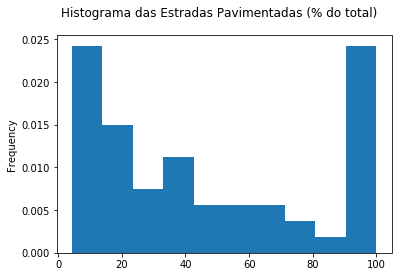

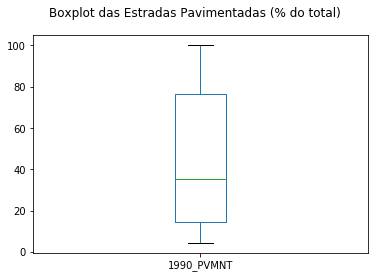

count     56.000000
mean      46.840691
std       34.221739
min        4.300000
25%       14.300000
50%       35.049999
75%       76.675001
max      100.000000
Name: 1990_PVMNT, dtype: float64

In [42]:
#Plotando os histogramas para o  PVMNT
D_JOIN["1990_PVMNT"].plot(kind="hist", density=True)
plt.suptitle("Histograma das Estradas Pavimentadas (% do total)")
plt.show()
D_JOIN["1990_PVMNT"].plot.box()
plt.suptitle("Boxplot das Estradas Pavimentadas (% do total)")
plt.show()
D_JOIN["1990_PVMNT"].describe()

### Análise: 
   Essa é uma variavel interessante,pois, existe uma anomalia; muito paises contam com 100% de estradas pavimentdas, enquanto o resto esta distrivuido ao longo das porcentagens, como pode ser evidenciado pela grande zona interquartis, observada no boxplot.


In [48]:
#Verificando as correlações
D_JOIN.corr()



,1990_URB,1990_PVMNT,1990_IDH
1990_URB,1.000000,0.225013,0.547674
1990_PVMNT,0.225013,1.000000,0.628346
1990_IDH,0.547674,0.628346,1.000000


# Analise conjuta

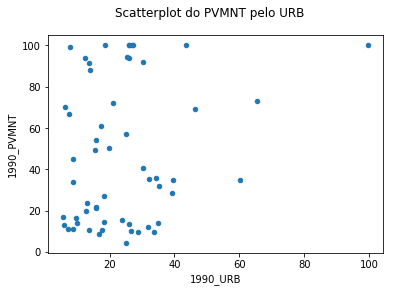

In [43]:
#Validando as variaveis por meio de scatterplot
D_JOIN.plot.scatter(x="1990_URB",y="1990_PVMNT")
plt.suptitle("Scatterplot do PVMNT pelo URB")
plt.show()

#### Analise:  
   Ao analisar o grafico de dispersão acima, podemos verificar que as variaveis não tem relação óbvia, por conta do espalhamento dos pontos no gráfico e a baixa correlação de 0,225. Concluindo que a escolha de variaveis foi coesa com ao proposito do projeto, visto que, se a correlaçao fosse alta, estariamos "desperdiçando uma variavel".


In [31]:
#Verificando as correlações
D_JOIN.corr()


,1990_URB,1990_PVMNT,1990_IDH
1990_URB,1.000000,0.225013,0.547674
1990_PVMNT,0.225013,1.000000,0.628346
1990_IDH,0.547674,0.628346,1.000000


[]

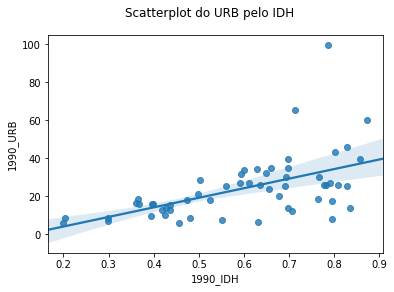

In [46]:
#plotando o scatter plot do IDH pela URB com a linha de tendencia
sns.regplot(D_JOIN["1990_IDH"],D_JOIN["1990_URB"])
plt.suptitle("Scatterplot do URB pelo IDH")
plt.plot()


### Análise
   Plotando um grafico de dispersão da população em nucleos urbanos pelo IDH e traçando uma linha de tendencia, podemos identificar um certo padrão. Existem varios pontos que aderem à reta, indicando que, conforme sobe o IDH, aumentam o numero de pessoas em centros urbanos; o que nos leva a pensar que exista uma grande correlação, o que não é o caso, pois a correlação = 0.547. Essa baixa correlação pode ser explicada pelo fato de termos alguns paises com IDH muito alto e com grande porcentagem de população em areas urbanas, o que ptejudicou o valor da correlação.



[]

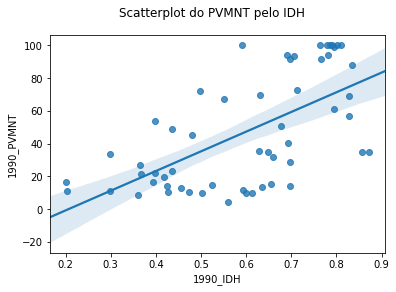

In [47]:
#plotando o scatter plot do IDH pela PVMNT com a linha de tendencia
sns.regplot(D_JOIN["1990_IDH"],D_JOIN["1990_PVMNT"])
plt.suptitle("Scatterplot do PVMNT pelo IDH")
plt.plot()

### Análise:
   O grafico scatterplot da porcentagem de estradas pavimentadas pelo IDH conta com pontos mais dispersos. A linha de tendencia não descreve os dados com clareza, pois os estes tem uma baixa aderencia à ela. Existem alguns paises que contam com 100% de estradas pavimentadas, e esses estão tambem entre os maiores no IDH, mas nao temos evidencia suficiente para dizer que a quantidade de ruas paviementas dita o IDH.

___
# Conclusão:


Os graficos e análises, individuais e coletivas, conseguem nos dar uma visão mais abrangente para responder a hipotese proposta. 

Para responder a pergunta, temos que olhar para as variaveis separadamente. Em primeiro lugar, temos a porcentagem de pessoas em centros urbanos, que nos apontou uma boa correlação, mas nao podemos, sem olhar o contexto todo, confirmar nenhuma relação de causalidade, pois não sabemos se o IDH sobe por conta dessa variavel ou o contrario ou ainda os dois se influenciam. Podemos dizer, porem, que existe alguma relação entre os dois. Ja em segundo lugar, temos a porcentagem de estradas paviementadas, indice que nos apresentou maior aleartoriedade, portanto nao nos deixou margem para conluirmos alguma relação. 

Por fim podemos dizer que a quantidade de estradas pavimentadas nao tem grande influência no IDH, porem, paises com IDH muito alto tem 100% das estradas paviementadas; e tambem, que a quantidade de pessoas em areas urbanas tem grande possibilidade de influenciar o IDH, seja este aumentado por aquela, ou vice versa.